In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
data= pd.read_csv('CarPrice_Assignment.csv')
data.shape

(205, 26)

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.drop('car_ID',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
data_int= data.select_dtypes(include=['float64','int64'])
data_int

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


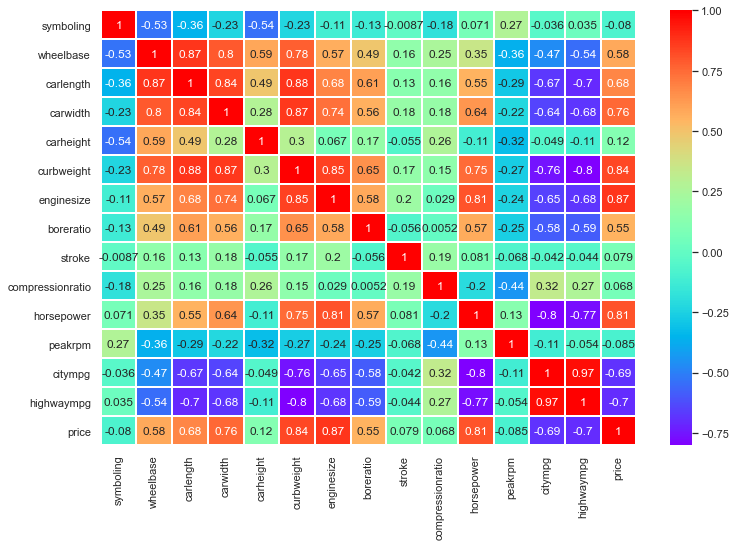

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data_int.corr(),annot=True,linewidths=1,cmap='rainbow');

In [8]:
data_int.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
data_object= data.select_dtypes(include='object')
data_object.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
data['Car_Brand']= data['CarName'].apply(lambda x: x.split(' ')[0])

In [11]:
data['Car_Brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
renault         2
vw              2
vokswagen       1
Nissan          1
porcshce        1
mercury         1
toyouta         1
Name: Car_Brand, dtype: int64

toyouta -toyota
porcshce -porsche Nissan - nissan maxda - mazda vokswagen, vw - volkswagen

In [12]:
data['Car_Brand']= data['Car_Brand'].str.replace('toyouta','toyota')
data['Car_Brand']= data['Car_Brand'].str.replace('porcshce','porsche')
data['Car_Brand']= data['Car_Brand'].str.replace('Nissan','nissan')
data['Car_Brand']= data['Car_Brand'].str.replace('maxda','mazda')
data['Car_Brand']= data['Car_Brand'].str.replace('vw','volkswagen')
data['Car_Brand']= data['Car_Brand'].str.replace('vokswagen','volkswagen')

In [13]:
data['Car_Brand'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: Car_Brand, dtype: int64

In [14]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Car_Brand'],
      dtype='object')

In [15]:
data['doornumber']= data['doornumber'].replace('four',4)
data['doornumber']= data['doornumber'].replace('two',2)

In [16]:
data['cylindernumber']=data['cylindernumber'].map({'four': 4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [17]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Brand
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
data.drop('CarName',axis=1,inplace=True)

In [19]:
data.shape

(205, 25)

In [20]:
dummy= pd.get_dummies(data,drop_first=True)

In [21]:
dummy.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Car_Brand_nissan,Car_Brand_peugeot,Car_Brand_plymouth,Car_Brand_porsche,Car_Brand_renault,Car_Brand_saab,Car_Brand_subaru,Car_Brand_toyota,Car_Brand_volkswagen,Car_Brand_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [22]:
scaler= StandardScaler()

In [23]:
var=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio','stroke',
       'compressionratio', 'horsepower', 'peakrpm','citympg','highwaympg']

In [24]:
X= dummy.drop('price',axis=1)
y= dummy['price']

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)

In [26]:
X_train[var]=scaler.fit_transform(X_train[var])

<ipython-input-26-14121cd0f46b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[var]=scaler.fit_transform(X_train[var])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [27]:
X_test[var]= scaler.transform(X_test[var])

<ipython-input-27-4adc6741c29b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[var]= scaler.transform(X_test[var])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [28]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
lr.score(X_test,y_test)

-3.7957170421605e+20

In [30]:
lr.coef_

array([-4.50205149e+00,  1.65941028e+02,  1.86352021e+03, -8.29972490e+02,
        9.33419517e+02, -1.14437004e+03,  2.27782391e+03, -2.09800364e+03,
        6.42529314e+03, -2.08069687e+03, -7.53824620e+02, -2.68940726e+03,
        8.24651399e+01,  1.21372965e+03,  9.33649147e+02,  2.08894350e+02,
       -3.71341690e+16,  2.34193987e+03, -4.66713532e+03, -4.76586123e+03,
       -3.86750202e+03, -3.52562709e+03, -2.09847682e+02,  3.14445868e+02,
       -4.06120884e+16,  5.35410503e+03,  6.96378870e+03,  2.14172060e+03,
        4.06120884e+16,  6.25265557e+02,  7.75068619e+03,  4.60037929e+02,
       -2.51564397e+03, -3.71341690e+16, -1.85553169e+03, -1.00309530e+03,
       -8.06204112e+02, -1.09141830e+15, -1.36934353e+02,  7.56817983e+03,
        1.78261097e+03, -5.04719110e+03, -5.02410487e+03, -4.09548645e+03,
       -2.99840056e+03, -1.38657867e+03, -1.43509962e+03,  8.78491310e+13,
       -5.92668352e+03, -2.49651571e+03, -9.79809801e+03, -5.06820654e+03,
        6.18135154e+03, -

In [31]:
lr.intercept_

3.713416896990521e+16

Start OLS (Ordinary least Square Method)

In [32]:
from sklearn.feature_selection import RFE

In [33]:
rfe1= RFE(lr,100)
rfe1.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=100)

In [34]:
rfe1.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
rfe1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [36]:
import statsmodels.api as sm

For 100 Columns

In [37]:
col_100= X_train.columns[rfe1.support_]

In [38]:
X_train_100= X_train[col_100]

In [39]:
X_train_100

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Car_Brand_nissan,Car_Brand_peugeot,Car_Brand_plymouth,Car_Brand_porsche,Car_Brand_renault,Car_Brand_saab,Car_Brand_subaru,Car_Brand_toyota,Car_Brand_volkswagen,Car_Brand_volvo
3,0.965645,0.873751,0.256524,0.290980,0.205880,0.286269,-0.343330,-0.339966,-0.372828,-0.419206,...,0,0,0,0,0,0,0,0,0,0
157,-0.692635,0.873751,-0.460676,-0.558965,-0.630100,-0.322919,-0.781780,-0.339966,-0.652371,-0.419206,...,0,0,0,0,0,0,0,1,0,0
81,1.794784,-1.144491,-0.355720,-0.006088,-0.165667,-1.703744,-0.360637,-0.339966,-0.042458,0.205437,...,0,0,0,0,0,0,0,0,0,0
32,0.136505,-1.144491,-0.810530,-1.904025,-0.815873,-0.404144,-1.304842,-0.339966,-1.135218,-1.512333,...,0,0,0,0,0,0,0,0,0,0
99,-0.692635,0.873751,-0.198286,0.026919,-0.258553,0.448719,-0.368329,-0.339966,-0.093284,0.127357,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.136505,0.873751,-0.355720,-0.055600,-0.165667,-0.810269,-0.216411,-0.339966,-0.347414,-0.497287,...,0,0,0,0,0,0,0,0,0,0
103,-0.692635,0.873751,0.361480,0.951132,0.345210,0.611169,1.047016,1.488048,1.456910,0.517759,...,1,0,0,0,0,0,0,0,0,0
67,-1.521775,0.873751,2.040777,1.471001,2.110055,1.179744,1.921992,0.574041,1.507736,1.103362,...,0,0,0,0,0,0,0,0,0,0
24,0.136505,0.873751,-0.810530,-1.301636,-0.908759,-1.216394,-1.054849,-0.339966,-0.855675,-1.278091,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# adding Constant 
X_train_100= sm.add_constant(X_train_100)

In [41]:
X_train_100.head()

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,Car_Brand_nissan,Car_Brand_peugeot,Car_Brand_plymouth,Car_Brand_porsche,Car_Brand_renault,Car_Brand_saab,Car_Brand_subaru,Car_Brand_toyota,Car_Brand_volkswagen,Car_Brand_volvo
3,1.0,0.965645,0.873751,0.256524,0.290980,0.205880,0.286269,-0.343330,-0.339966,-0.372828,...,0,0,0,0,0,0,0,0,0,0
157,1.0,-0.692635,0.873751,-0.460676,-0.558965,-0.630100,-0.322919,-0.781780,-0.339966,-0.652371,...,0,0,0,0,0,0,0,1,0,0
81,1.0,1.794784,-1.144491,-0.355720,-0.006088,-0.165667,-1.703744,-0.360637,-0.339966,-0.042458,...,0,0,0,0,0,0,0,0,0,0
32,1.0,0.136505,-1.144491,-0.810530,-1.904025,-0.815873,-0.404144,-1.304842,-0.339966,-1.135218,...,0,0,0,0,0,0,0,0,0,0
99,1.0,-0.692635,0.873751,-0.198286,0.026919,-0.258553,0.448719,-0.368329,-0.339966,-0.093284,...,1,0,0,0,0,0,0,0,0,0


In [42]:
lm1= sm.OLS(y_train,X_train_100).fit()

In [43]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     64.53
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           1.52e-62
Time:                        20:49:57   Log-Likelihood:                -1410.8
No. Observations:                 164   AIC:                             2934.
Df Residuals:                     108   BIC:                             3107.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.27e+04   2244.379      5.659      0.000    8251.662    1.71e+04
symboling               -4.5021    295.994     -0.015      0.988    -591.213     582.209
doornumber             162.3731    244.098      0.665      0.507    -321.472     646.218
wheelbase             1841.1166    622.799      2.956      0.004     606.622    3075.611
carlength             -787.2746    622.599     -1.264      0.209   -2021.374     446.824
carwidth               907.4496    514.625      1.763      0.081    -112.626    1927.525
carheight            -1146.7933    348.359     -3.292      0.001   -1837.302    -456.285
curbweight            2256.4900    899.069      2.510      0.014     474.379    4038.601
cylindernumber       -2100.0876   1128.851     -1.860      0.066   -4337.666     137.490
enginesize            6486.5202   1868.513      3.471      0.001    2782.803    1.02e+04
boreratio            -2097.1604    767.465     -2.733      0.007   -3618.409    -575.912
stroke                -743.4706    448.198     -1.659      0.100   -1631.878     144.937
compressionratio     -2585.3473   1771.614     -1.459      0.147   -6096.994     926.299
horsepower              35.1873    882.670      0.040      0.968   -1714.418    1784.793
peakrpm               1227.2997    322.312      3.808      0.000     588.421    1866.178
citympg                839.2684    928.415      0.904      0.368   -1001.010    2679.547
highwaympg             277.1451    820.777      0.338      0.736   -1349.777    1904.067
fueltype_gas          2782.5409   2594.563      1.072      0.286   -2360.334    7925.415
aspiration_turbo      2399.2313    864.348      2.776      0.006     685.944    4112.519
carbody_hardtop      -4772.5977   1462.184     -3.264      0.001   -7670.899   -1874.296
carbody_hatchback    -4844.0086   1282.514     -3.777      0.000   -7386.173   -2301.844
carbody_sedan        -3959.5169   1354.592     -2.923      0.004   -6644.553   -1274.481
carbody_wagon        -3593.6148   1463.662     -2.455      0.016   -6494.846    -692.383
drivewheel_fwd        -190.5782    862.089     -0.221      0.825   -1899.389    1518.233
drivewheel_rwd         307.8203   1134.017      0.271      0.787   -1939.997    2555.638
enginelocation_rear   6709.7481   2192.653      3.060      0.003    2363.530    1.11e+04
enginetype_dohcv      5484.6581   3788.010      1.448      0.151   -2023.835     1.3e+04
enginetype_l          6995.1553   2384.149      2.934      0.004    2269.359    1.17e+04
enginetype_ohc        2169.5248   1016.915      2.133      0.035     153.822    4185.227
enginetype_ohcf       3992.8274   1067.895      3.739      0.000    1876.075    6109.580
enginetype_ohcv        620.5548   1248.424      0.497      0.620   -1854.038    3095.148
enginetype_rotor      7699.2355   2651.826      2.903    

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif= pd.DataFrame()

In [46]:
vif['Feature']= X_train_100.columns

In [47]:
vif['VIF']= [variance_inflation_factor(X_train_100.values,i) for i in range(X_train_100.shape[1])]

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [48]:
vif.sort_values(by='VIF',ascending=False)

,Feature,VIF
29,enginetype_ohcf,inf
34,fuelsystem_idi,inf
25,enginelocation_rear,inf
17,fueltype_gas,inf
56,Car_Brand_subaru,inf
9,enginesize,217.158986
12,compressionratio,195.219814
8,cylindernumber,79.260836
36,fuelsystem_mpfi,70.219323
32,fuelsystem_2bbl,54.361899


for 50 Columns

In [49]:
rfe2= RFE(lr,50)
rfe2.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=50)

In [50]:
col_50= X_train.columns[rfe2.support_]

In [51]:
X_train_50= X_train[col_50]

In [52]:
X_train_50= sm.add_constant(X_train_50)

In [53]:
lm2= sm.OLS(y_train,X_train_50).fit()

In [54]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     78.31
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           6.08e-69
Time:                        20:49:58   Log-Likelihood:                -1411.3
No. Observations:                 164   AIC:                             2921.
Df Residuals:                     115   BIC:                             3072.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+04   1724.290      7.359      0.000    9274.352    1.61e+04
wheelbase             1847.3195    513.518      3.597      0.000     830.139    2864.500
carlength             -773.8940    580.880     -1.332      0.185   -1924.506     376.718
carwidth               916.7633    467.560      1.961      0.052      -9.383    1842.909
carheight            -1153.9908    327.179     -3.527      0.001   -1802.070    -505.911
curbweight            2413.2048    751.676      3.210      0.002     924.278    3902.131
cylindernumber       -2079.6521    880.024     -2.363      0.020   -3822.811    -336.493
enginesize            6323.4760   1466.287      4.313      0.000    3419.043    9227.909
boreratio            -2067.5364    598.257     -3.456      0.001   -3252.569    -882.504
stroke                -721.8452    401.800     -1.797      0.075   -1517.733      74.043
compressionratio     -2550.9550   1623.846     -1.571      0.119   -5767.481     665.571
peakrpm               1199.0135    255.546      4.692      0.000     692.827    1705.200
citympg                779.2909    814.008      0.957      0.340    -833.101    2391.683
highwaympg             313.5599    771.296      0.407      0.685   -1214.230    1841.349
fueltype_gas          3097.0548   2018.080      1.535      0.128    -900.374    7094.484
aspiration_turbo      2388.5276    636.124      3.755      0.000    1128.489    3648.567
carbody_hardtop      -4790.3839   1362.779     -3.515      0.001   -7489.786   -2090.982
carbody_hatchback    -4845.3183   1160.669     -4.175      0.000   -7144.380   -2546.256
carbody_sedan        -3758.6993   1201.732     -3.128      0.002   -6139.099   -1378.299
carbody_wagon        -3405.5081   1323.572     -2.573      0.011   -6027.249    -783.767
drivewheel_rwd         347.1212    650.451      0.534      0.595    -941.296    1635.539
enginelocation_rear   6857.2315   1734.853      3.953      0.000    3420.821    1.03e+04
enginetype_dohcv      5478.5258   3144.296      1.742      0.084    -749.719    1.17e+04
enginetype_l          6933.9023   2224.130      3.118      0.002    2528.328    1.13e+04
enginetype_ohc        2102.9585    891.649      2.359      0.020     336.774    3869.143
enginetype_ohcf       4063.0314   1001.283      4.058      0.000    2079.682    6046.381
enginetype_ohcv        672.0217   1150.024      0.584      0.560   -1605.955    2949.999
enginetype_rotor      7578.0974   2255.413      3.360      0.001    3110.558     1.2e+04
fuelsystem_4bbl      -2922.2987   1945.517     -1.502      0.136   -6775.993     931.396
fuelsystem_idi        9592.7841   3449.101      2.781      0.006    2760.779    1.64e+04
fuelsystem_mfi       -2470.6589   1898.994     -1.301      0.196   -6232.200    1290.882
fuelsystem_mpfi      -1461.3728    590.184     -2.476    

In [55]:
vif2= pd.DataFrame()

In [56]:
vif2['Feature']= X_train_50.columns

In [57]:
vif2['VIF']=[variance_inflation_factor(X_train_50.values,i) for i in range(X_train_50.shape[1])]

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [58]:
vif2

,Feature,VIF
0,const,0.000000
1,wheelbase,17.373172
2,carlength,22.230083
3,carwidth,14.402639
4,carheight,7.052443
5,curbweight,37.224562
6,cylindernumber,51.021946
7,enginesize,141.646533
8,boreratio,23.580009
9,stroke,10.636214


For 25

In [59]:
rfe3= RFE(lr,25)
rfe3.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=25)

In [60]:
col_25= X_train.columns[rfe3.support_]

In [61]:
X_train_25= X_train[col_25]

In [62]:
X_train_25= sm.add_constant(X_train_25)

In [63]:
lm3= sm.OLS(y_train,X_train_25).fit()

In [64]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     91.31
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           4.64e-73
Time:                        20:49:58   Log-Likelihood:                -1468.5
No. Observations:                 164   AIC:                             2987.
Df Residuals:                     139   BIC:                             3064.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.155e+04   1241.293      9.307      0.000    9099.078     1.4e+04
curbweight            2766.4384    516.169      5.360      0.000    1745.880    3786.996
enginesize            2720.5774    449.300      6.055      0.000    1832.232    3608.922
compressionratio     -1896.5809   1282.439     -1.479      0.141   -4432.191     639.029
fueltype_gas          2577.1106   1564.558      1.647      0.102    -516.299    5670.520
enginelocation_rear   9091.2557   2096.179      4.337      0.000    4946.737    1.32e+04
enginetype_l          2821.1125   2500.005      1.128      0.261   -2121.842    7764.067
enginetype_rotor      7146.7172   2249.384      3.177      0.002    2699.285    1.16e+04
fuelsystem_4bbl      -2179.0946   2349.634     -0.927      0.355   -6824.738    2466.549
fuelsystem_idi        8976.2248   2766.693      3.244      0.001    3505.981    1.44e+04
fuelsystem_mfi       -3226.4029   2242.637     -1.439      0.152   -7660.495    1207.690
Car_Brand_bmw         6408.6021    952.129      6.731      0.000    4526.073    8291.131
Car_Brand_buick       3963.9758   1123.716      3.528      0.001    1742.190    6185.762
Car_Brand_chevrolet  -2347.8947   1573.212     -1.492      0.138   -5458.415     762.625
Car_Brand_dodge      -3255.8164    929.072     -3.504      0.001   -5092.757   -1418.876
Car_Brand_honda      -2749.6130    832.208     -3.304      0.001   -4395.036   -1104.190
Car_Brand_mazda      -2923.3714    859.755     -3.400      0.001   -4623.259   -1223.484
Car_Brand_mitsubishi -4950.0224    863.240     -5.734      0.000   -6656.802   -3243.243
Car_Brand_nissan     -3721.3829    737.748     -5.044      0.000   -5180.042   -2262.724
Car_Brand_peugeot    -7404.9435   2684.406     -2.759      0.007   -1.27e+04   -2097.395
Car_Brand_plymouth   -3748.0292   1062.467     -3.528      0.001   -5848.716   -1647.343
Car_Brand_porsche     5700.8923   1524.331      3.740      0.000    2687.020    8714.765
Car_Brand_renault    -5850.9483   1517.881     -3.855      0.000   -8852.069   -2849.828
Car_Brand_subaru     -3987.3934    789.663     -5.049      0.000   -5548.697   -2426.089
Car_Brand_toyota     -4110.8776    618.931     -6.642      0.000   -5334.614   -2887.141
Car_Brand_volkswagen -2439.5678    805.959     -3.027      0.003   -4033.092    -846.044
==============================================================================
Omnibus:                       25.151   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.665
Skew:                           0.373   Prob(JB):                     1.54e-24
Kurtosis:                       6.936   Cond. No.                     3.64e+16
==============================================================================

Notes:
[1] Standard Errors 

In [65]:
vif3= pd.DataFrame()

In [66]:
vif3['Feature']= X_train_25.columns

In [67]:
vif3['VIF']= [variance_inflation_factor(X_train_25.values,i) for i in range(X_train_25.shape[1])]

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
vif3.head()

,Feature,VIF
0,const,0.000000
1,curbweight,10.559302
2,enginesize,8.000610
3,compressionratio,65.181568
4,fueltype_gas,inf


For 10

In [69]:
rfe4= RFE(lr,10)
rfe4.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [70]:
col_10= X_train.columns[rfe4.support_]

In [71]:
X_train_10=X_train[col_10]

In [72]:
X_train_10= sm.add_constant(X_train_10)

In [73]:
lm4= sm.OLS(y_train,X_train_10).fit()

In [74]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           2.55e-75
Time:                        20:49:59   Log-Likelihood:                -1500.6
No. Observations:                 164   AIC:                             3023.
Df Residuals:                     153   BIC:                             3057.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.203e+04    210.908     57.043      0.000    1.16e+04    1.24e+04
curbweight           3836.2600    477.644      8.032      0.000    2892.631    4779.889
enginesize           2296.8554    468.130      4.906      0.000    1372.023    3221.688
enginelocation_rear  9995.3622   2402.790      4.160      0.000    5248.433    1.47e+04
enginetype_rotor     4745.4017   1313.858      3.612      0.000    2149.757    7341.047
fuelsystem_mfi      -3133.5384   2377.767     -1.318      0.190   -7831.032    1563.956
Car_Brand_bmw        8821.5554   1028.248      8.579      0.000    6790.159    1.09e+04
Car_Brand_buick      5564.3922   1213.483      4.585      0.000    3167.048    7961.737
Car_Brand_peugeot   -2594.7343   1026.146     -2.529      0.012   -4621.979    -567.490
Car_Brand_porsche    7460.4868   1713.878      4.353      0.000    4074.566    1.08e+04
Car_Brand_renault   -2951.1984   1682.907     -1.754      0.081   -6275.934     373.537
==============================================================================
Omnibus:                       12.970   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.422
Skew:                           0.364   Prob(JB):                     8.20e-06
Kurtosis:                       4.702   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif4= pd.DataFrame()

In [76]:
vif4['Feature']= X_train_10.columns

In [77]:
vif4['vif']= [variance_inflation_factor(X_train_10.values,i) for i in range(X_train_10.shape[1])]

In [78]:
vif4.sort_values(by='vif',ascending=False)

,Feature,vif
1,curbweight,6.725301
2,enginesize,6.460050
9,Car_Brand_porsche,2.060419
3,enginelocation_rear,2.050182
8,Car_Brand_peugeot,1.440286
0,const,1.311260
7,Car_Brand_buick,1.283069
4,enginetype_rotor,1.210856
6,Car_Brand_bmw,1.098550
5,fuelsystem_mfi,1.010048


for 8

In [79]:
rfe5= RFE(lr,8)
rfe5.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=8)

In [80]:
col_8= X_train.columns[rfe5.support_]

In [81]:
X_train_8= X_train[col_8]

In [82]:
X_train_8= sm.add_constant(X_train_8)

In [83]:
lm5= sm.OLS(y_train,X_train_8).fit()

In [84]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           3.75e-72
Time:                        20:49:59   Log-Likelihood:                -1514.0
No. Observations:                 164   AIC:                             3046.
Df Residuals:                     155   BIC:                             3074.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.218e+04    223.400     54.513      0.000    1.17e+04    1.26e+04
curbweight           5901.6648    244.111     24.176      0.000    5419.451    6383.878
enginelocation_rear  1.216e+04   2546.320      4.774      0.000    7125.401    1.72e+04
fuelsystem_mfi      -2567.4268   2559.139     -1.003      0.317   -7622.718    2487.864
Car_Brand_bmw        9560.4905   1093.646      8.742      0.000    7400.116    1.17e+04
Car_Brand_buick      5398.0666   1307.275      4.129      0.000    2815.693    7980.441
Car_Brand_peugeot   -4763.5306   1004.044     -4.744      0.000   -6746.907   -2780.154
Car_Brand_porsche    8215.7230   1838.315      4.469      0.000    4584.339    1.18e+04
Car_Brand_renault   -2628.1809   1811.758     -1.451      0.149   -6207.104     950.742
==============================================================================
Omnibus:                       14.723   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.635
Skew:                           0.159   Prob(JB):                     3.35e-10
Kurtosis:                       5.507   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif5= pd.DataFrame()
vif5['Feature']= X_train_8.columns
vif5['VIF']= [variance_inflation_factor(X_train_8.values,i) for i in range(X_train_8.shape[1])]

In [86]:
vif5.sort_values(by='VIF',ascending=False)

,Feature,VIF
7,Car_Brand_porsche,2.039989
2,enginelocation_rear,1.981431
1,curbweight,1.511715
5,Car_Brand_buick,1.281471
0,const,1.266084
6,Car_Brand_peugeot,1.186665
4,Car_Brand_bmw,1.069473
3,fuelsystem_mfi,1.006893
8,Car_Brand_renault,1.003121


In [87]:
## ['Car_Brand_renault','fuelsystem_mfi']

In [88]:
X_train_9=X_train_8.drop(['Car_Brand_renault','fuelsystem_mfi'],axis=1)

In [89]:
X_train_9

,const,curbweight,enginelocation_rear,Car_Brand_bmw,Car_Brand_buick,Car_Brand_peugeot,Car_Brand_porsche
3,1.0,-0.343330,0,0,0,0,0
157,1.0,-0.781780,0,0,0,0,0
81,1.0,-0.360637,0,0,0,0,0
32,1.0,-1.304842,0,0,0,0,0
99,1.0,-0.368329,0,0,0,0,0
...,...,...,...,...,...,...,...
87,1.0,-0.216411,0,0,0,0,0
103,1.0,1.047016,0,0,0,0,0
67,1.0,1.921992,0,0,1,0,0
24,1.0,-1.054849,0,0,0,0,0


In [90]:
X_train_9= sm.add_constant(X_train_9)

In [91]:
lm6= sm.OLS(y_train,X_train_9).fit()

In [92]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     220.8
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           7.71e-74
Time:                        20:50:00   Log-Likelihood:                -1515.6
No. Observations:                 164   AIC:                             3045.
Df Residuals:                     157   BIC:                             3067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.212e+04    221.332     54.743      0.000    1.17e+04    1.26e+04
curbweight           5872.3448    244.125     24.055      0.000    5390.152    6354.538
enginelocation_rear  1.214e+04   2554.997      4.751      0.000    7092.190    1.72e+04
Car_Brand_bmw        9647.8920   1096.174      8.801      0.000    7482.742    1.18e+04
Car_Brand_buick      5526.2707   1309.399      4.220      0.000    2939.960    8112.581
Car_Brand_peugeot   -4661.2980   1005.617     -4.635      0.000   -6647.581   -2675.015
Car_Brand_porsche    8308.9696   1843.768      4.507      0.000    4667.178     1.2e+04
==============================================================================
Omnibus:                       14.142   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               38.072
Skew:                           0.202   Prob(JB):                     5.40e-09
Kurtosis:                       5.326   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
final_lr= LinearRegression()
final_lr.fit(X_train_9,y_train)

LinearRegression()

In [94]:
final_lr.coef_

array([    0.        ,  5872.3447891 , 12138.79188402,  9647.89195789,
        5526.27072184, -4661.29801005,  8308.96959289])

In [95]:
final_lr.intercept_

12116.328558440524

In [96]:
X_train_9.columns

Index(['const', 'curbweight', 'enginelocation_rear', 'Car_Brand_bmw',
       'Car_Brand_buick', 'Car_Brand_peugeot', 'Car_Brand_porsche'],
      dtype='object')

In [97]:
X_test_9= X_test[['curbweight', 'enginelocation_rear', 'Car_Brand_bmw',
       'Car_Brand_buick', 'Car_Brand_peugeot', 'Car_Brand_porsche']]

In [98]:
X_test_9= sm.add_constant(X_test_9)

In [99]:
final_lr.score(X_test_9,y_test)

0.8553729906352846

In [100]:
y_pred= final_lr.predict(X_test_9)

In [101]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
print('Mean_absolute_error',MAE)
print('Mean_squared_error',MSE)

Mean_absolute_error 2193.1540347124474
Mean_squared_error 11141888.327598054
